# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 💾 The data
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

In [2]:
import pandas as pd
df = pd.read_csv('data/hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

# EXPLORATORY DATA ANALYSIS

## 1 - Imports and Reading Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

%matplotlib inline
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('data/hospital_readmissions.csv')

## 2 - Data Understanding

In [5]:
df.shape

(25000, 17)

In [6]:
df.sample(10)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
16757,[40-50),4,32,1,9,0,3,0,Missing,Respiratory,Respiratory,Circulatory,no,no,no,no,yes
13586,[70-80),7,44,3,30,13,2,2,Missing,Diabetes,Musculoskeletal,Other,no,no,yes,yes,yes
19398,[40-50),9,69,0,20,0,0,0,Family/GeneralPractice,Diabetes,Other,Other,no,no,yes,yes,no
18295,[80-90),12,37,0,13,0,0,0,Missing,Respiratory,Respiratory,Respiratory,no,no,no,no,no
23255,[40-50),2,41,1,14,0,1,0,Other,Other,Circulatory,Musculoskeletal,no,no,no,yes,no
21455,[50-60),1,67,0,12,0,0,0,InternalMedicine,Other,Diabetes,Other,no,high,no,yes,no
14245,[60-70),14,68,5,16,1,3,0,Cardiology,Other,Respiratory,Diabetes,no,no,no,no,yes
14506,[50-60),1,54,0,13,4,0,1,InternalMedicine,Circulatory,Diabetes,Other,no,no,yes,yes,yes
16827,[40-50),5,1,3,2,0,0,0,Family/GeneralPractice,Digestive,Digestive,Other,no,no,no,no,no
12294,[80-90),9,62,3,8,0,0,0,Missing,Other,Other,Respiratory,no,normal,no,no,yes


In [7]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [8]:
df.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [9]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


## 3 - Data Preparation

In [10]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [11]:
df_features = df.copy()

Since some of our columns are object types we are going to convert them to categorical variables with a numerical code responding to the value.

In [12]:
df_features['age_group_code'] = df['age'].astype('category').cat.codes
df_features['specialty_code'] = df['medical_specialty'].astype('category').cat.codes
df_features['d1_code'] = df['diag_1'].astype('category').cat.codes
df_features['d2_code'] = df['diag_2'].astype('category').cat.codes
df_features['d3_code'] = df['diag_2'].astype('category').cat.codes
df_features['glucose_test_code'] = df['glucose_test'].astype('category').cat.codes
df_features['a1ctest_code'] = df['A1Ctest'].astype('category').cat.codes
df_features['change_code'] = df['change'].astype('category').cat.codes
df_features['diabetes_med_code'] = df['change'].astype('category').cat.codes
df_features['readmitted_code'] = df['change'].astype('category').cat.codes

df_features.head()
df_features_2 = df_features.copy()

In [13]:
df.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24995    False
24996    False
24997    False
24998    False
24999    False
Length: 25000, dtype: bool

In [15]:
df_features.corr()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,age_group_code,specialty_code,d1_code,d2_code,d3_code,glucose_test_code,a1ctest_code,change_code,diabetes_med_code,readmitted_code
time_in_hospital,1.000000,0.328326,0.179249,0.449415,-0.011309,0.076916,-0.013115,0.086268,0.043180,0.030004,0.088306,0.088306,-0.039572,-0.024386,0.107344,0.107344,0.107344
n_lab_procedures,0.328326,1.000000,0.048827,0.271741,-0.004309,0.043713,-0.004929,0.028796,-0.073420,-0.026125,0.052641,0.052641,-0.029715,-0.091193,0.062321,0.062321,0.062321
n_procedures,0.179249,0.048827,1.000000,0.368681,-0.034796,-0.069078,-0.042906,-0.093356,-0.017974,-0.241709,-0.121367,-0.121367,-0.007961,0.001345,-0.000009,-0.000009,-0.000009
n_medications,0.449415,0.271741,0.368681,1.000000,0.043185,0.065572,0.012944,-0.039604,0.088286,-0.050642,0.003524,0.003524,-0.040051,-0.017831,0.248529,0.248529,0.248529
n_outpatient,-0.011309,-0.004309,-0.034796,0.043185,1.000000,0.127736,0.096912,0.019860,0.052684,0.010055,0.024598,0.024598,0.008546,-0.006783,0.025531,0.025531,0.025531
n_inpatient,0.076916,0.043713,-0.069078,0.065572,0.127736,1.000000,0.220285,-0.021917,0.013816,0.016539,0.039194,0.039194,-0.011417,0.016944,0.012442,0.012442,0.012442
n_emergency,-0.013115,-0.004929,-0.042906,0.012944,0.096912,0.220285,1.000000,-0.070886,-0.016577,0.030374,0.044488,0.044488,-0.002418,0.004205,0.029221,0.029221,0.029221
age_group_code,0.086268,0.028796,-0.093356,-0.039604,0.019860,-0.021917,-0.070886,1.000000,-0.027602,-0.017524,-0.011906,-0.011906,0.003367,0.064382,-0.053464,-0.053464,-0.053464
specialty_code,0.043180,-0.073420,-0.017974,0.088286,0.052684,0.013816,-0.016577,-0.027602,1.000000,0.100901,0.067086,0.067086,0.005818,0.049592,-0.029648,-0.029648,-0.029648
d1_code,0.030004,-0.026125,-0.241709,-0.050642,0.010055,0.016539,0.030374,-0.017524,0.100901,1.000000,0.169757,0.169757,0.000308,0.029283,0.019518,0.019518,0.019518


## 4 - Feature Understanding

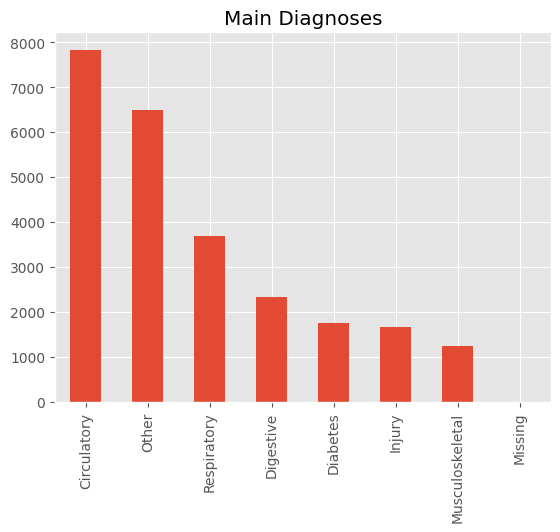

In [16]:
ax = df['diag_1'].value_counts().plot(kind='bar', title='Main Diagnoses')


Most patients that came in had a main diagnosis that was a circulatory issue, the 2nd most common main diagnosis was 'other' and the third most common was respiratory.

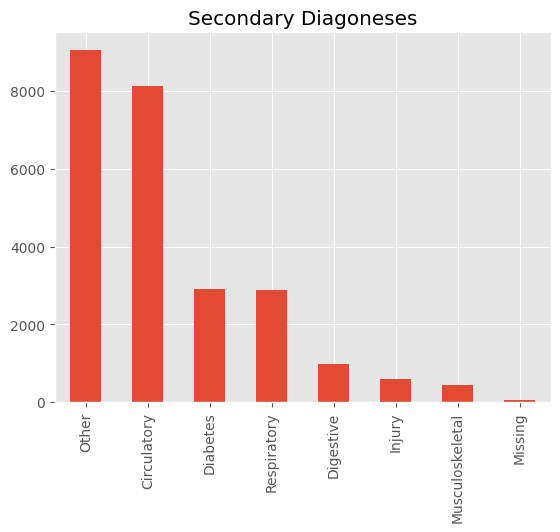

In [17]:
ax = df['diag_2'].value_counts().plot(kind='bar', title='Secondary Diagoneses')

The most common secondary diagnosis was 'other', closely followed by circulatory. Diabetes and Respiratory where extremely close for the 3rd and 4th most common secondary diagnoses.

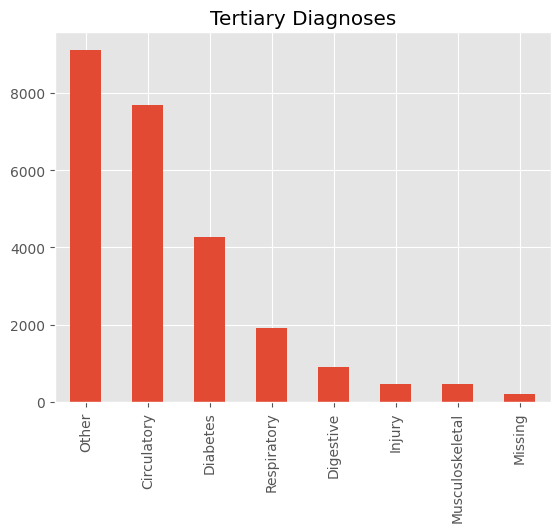

In [18]:
ax = df['diag_3'].value_counts().plot(kind='bar', title='Tertiary Diagnoses')

The most common tertiary diagnosis was 'Other', closely followed by circulatory and with diabetes being the third most common.

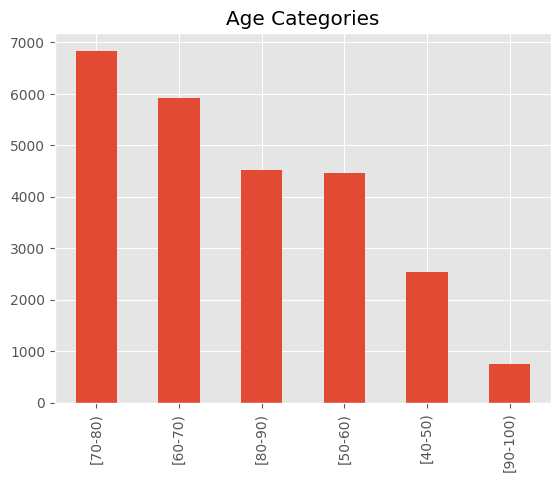

In [19]:
ax = df['age'].value_counts().plot(kind='bar', title='Age Categories')

This study was conducted over a 10 year period. The most common age groups for patients was 70-80, 60-70 and 80-90.

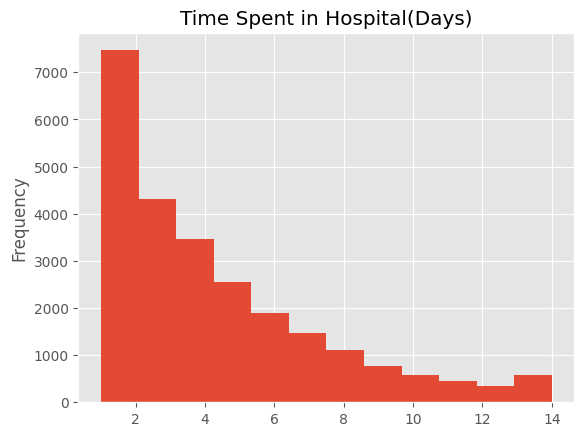

In [20]:
ax = df['time_in_hospital'].plot(kind='hist', bins=12, title='Time Spent in Hospital(Days)')

The time spent in the hospital follows a normal distribution and is right-skewed meaning that majority of patients did not stay in the hospital for an extended period of time and as we can see the most common time spent in the hospital was only one or two days.

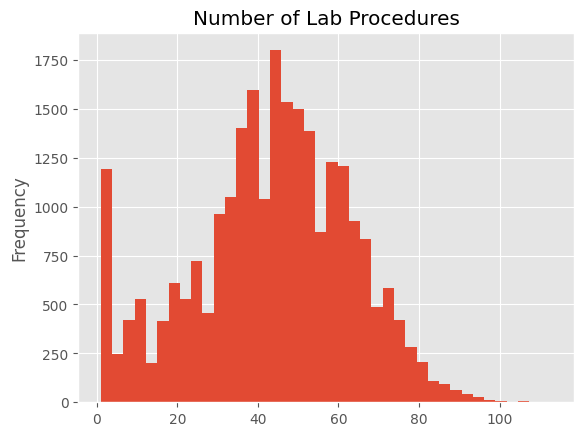

In [21]:
ax = df['n_lab_procedures'].plot(kind='hist', bins=40, title='Number of Lab Procedures')

Mostly follows a normal distribution, but we can see that there is a large amount of patients that has very few lab procedures making it right-skewed.

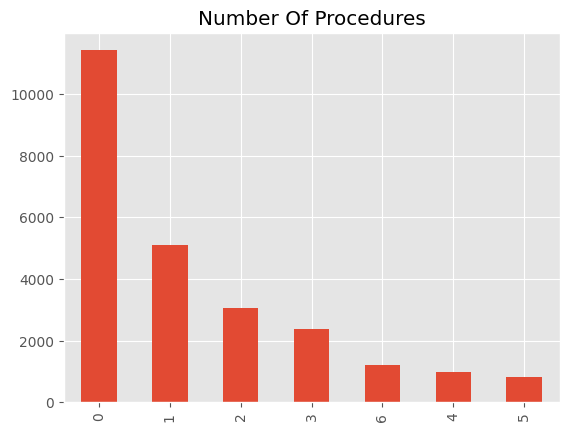

In [22]:
ax = df['n_procedures'].value_counts().plot(kind='bar', title='Number Of Procedures')

The vast majority of patients had 0 procedures done.

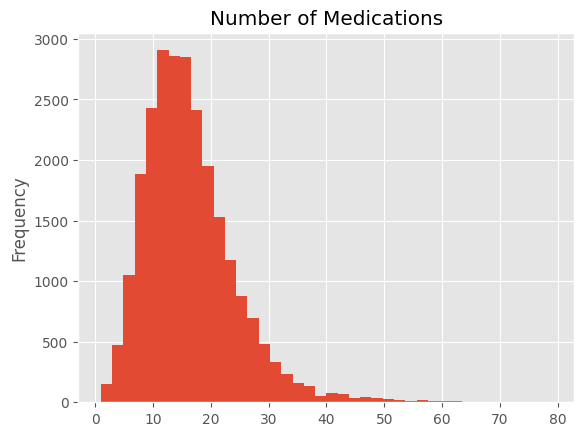

In [23]:
ax = df['n_medications'].plot(kind='hist', bins=40, title='Number of Medications')

Most patients were taking 10-15 medications.

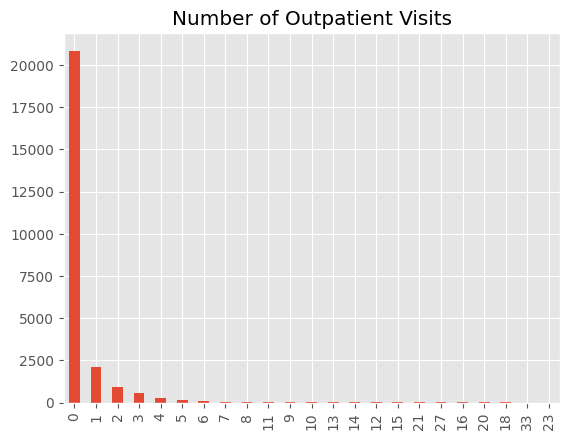

In [24]:
ax = df['n_outpatient'].value_counts().plot(kind='bar', title='Number of Outpatient Visits')

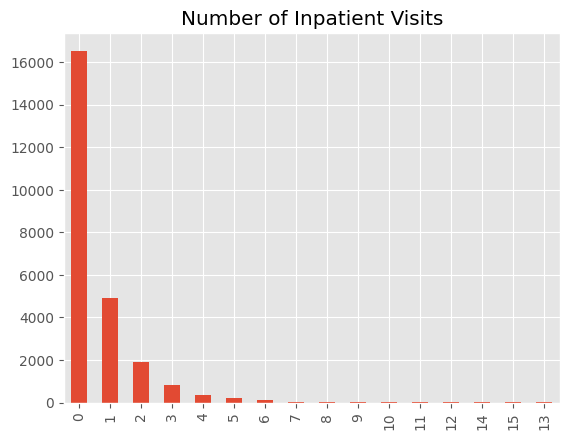

In [25]:
ax = df['n_inpatient'].value_counts().plot(kind='bar', title='Number of Inpatient Visits')

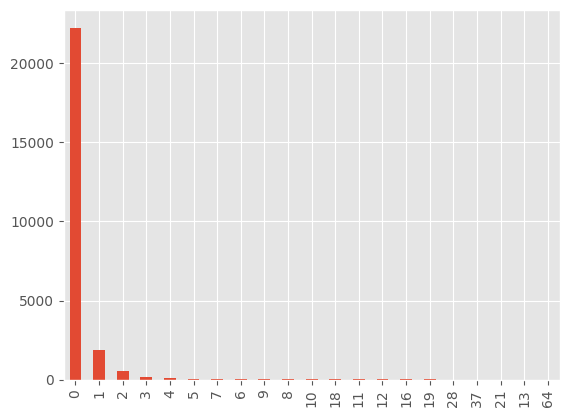

In [26]:
ax = df['n_emergency'].value_counts().plot(kind='bar')

## 6 Answering Questions

### 6.1 - What is the most common primary diagnosis by age group?


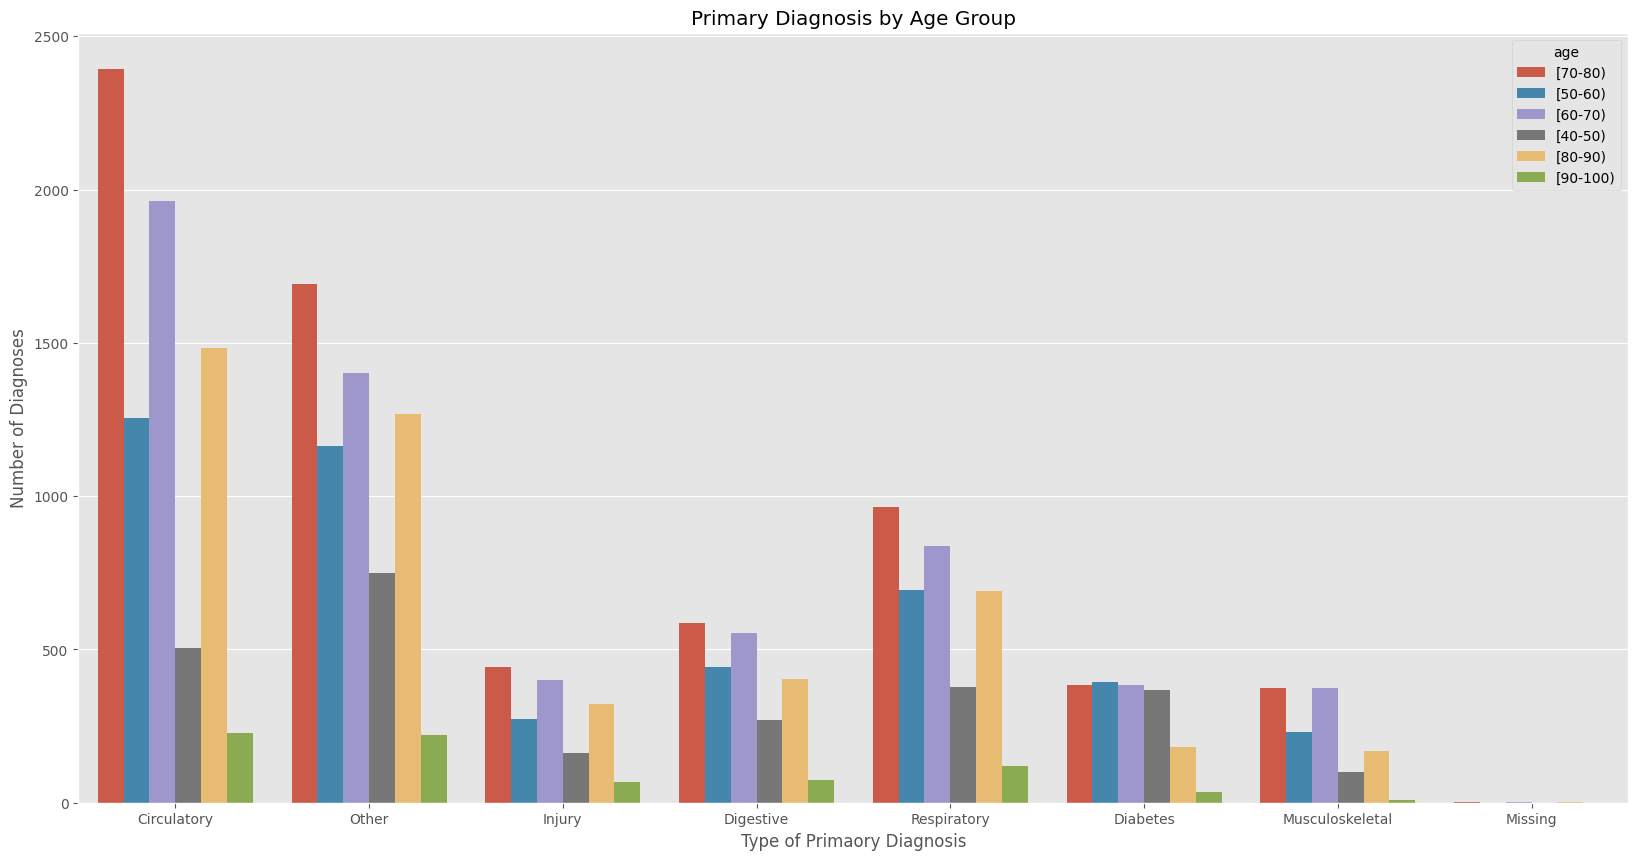

In [27]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='diag_1', hue='age', data=df)

ax.set_ylabel('Number of Diagnoses')
ax.set_xlabel('Type of Primaory Diagnosis')
ax.set_title('Primary Diagnosis by Age Group')
plt.show()

In [28]:
df.groupby('age')['diag_1'].value_counts()

age       diag_1         
[40-50)   Other               750
          Circulatory         504
          Respiratory         376
          Diabetes            369
          Digestive           271
          Injury              162
          Musculoskeletal     100
[50-60)   Circulatory        1256
          Other              1164
          Respiratory         694
          Digestive           442
          Diabetes            393
          Injury              273
          Musculoskeletal     230
[60-70)   Circulatory        1962
          Other              1402
          Respiratory         836
          Digestive           554
          Injury              400
          Diabetes            385
          Musculoskeletal     373
          Missing               1
[70-80)   Circulatory        2392
          Other              1693
          Respiratory         964
          Digestive           585
          Injury              444
          Diabetes            385
          Musculoskele

In [29]:
df.groupby('age')['diag_1'].value_counts(normalize=True) * 100

age       diag_1         
[40-50)   Other              29.620853
          Circulatory        19.905213
          Respiratory        14.849921
          Diabetes           14.573460
          Digestive          10.703002
          Injury              6.398104
          Musculoskeletal     3.949447
[50-60)   Circulatory        28.212040
          Other              26.145553
          Respiratory        15.588500
          Digestive           9.928122
          Diabetes            8.827493
          Injury              6.132075
          Musculoskeletal     5.166217
[60-70)   Circulatory        33.181126
          Other              23.710468
          Respiratory        14.138339
          Digestive           9.369187
          Injury              6.764756
          Diabetes            6.511077
          Musculoskeletal     6.308135
          Missing             0.016912
[70-80)   Circulatory        34.986105
          Other              24.762323
          Respiratory        14.099751

#### Observation

|Age Group | Most Common Primary Diagnosis | Amount | Percentage |
| --- | --- | --- | --- |
| 40-50 | Other | 750 | 29.52% |
| 50-60 | Circulatory | 750 | 29.62% |
| 50-60 | Circulatory | 1256 | 28.21% |
| 60-70 | Circulatory | 1962 | 32.18% |
| 70-80 | Circulatory | 2392 | 34.98% |
| 80-90 | Circulatory | 1482 | 32.82% |
| 90-100 | Circulatory | 228 | 30.40% |

Looking at the table above all age groups except 40-50 had a primary diagnosis of a circulatory issue. The 40-50 age group's most common primary diagnosis. Looking at this [data](https://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm) from the CDC we can see that heart disease is the leading cause of death for people in the United States. With heart disease being the leading cause of death in the US it is no surprise that majority of the patients had circulatory issues.

### 6.2 - Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates.

In [30]:
diabetes_df = df[df['diag_1'] == 'Diabetes'].copy()

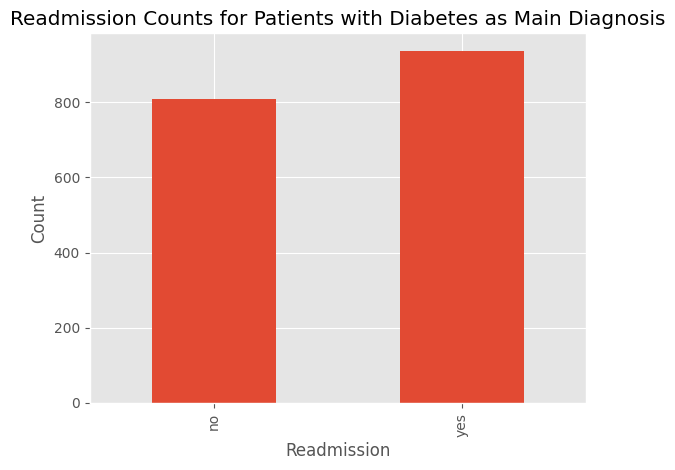

In [31]:
# Use the groupby() method to group the filtered dataframe by the 'readmitted' column
readmission_groups = diabetes_df.groupby('readmitted')

# Use the size() method to count the number of rows in each group
readmission_counts = readmission_groups.size()

# Use the plot() method to create a bar chart
readmission_counts.plot(kind='bar')
plt.xlabel('Readmission')
plt.ylabel('Count')
plt.title('Readmission Counts for Patients with Diabetes as Main Diagnosis')
plt.show()

#### Observation
From the results, it appears that patients with diabetes as their main diagnosis (diag_1) are readmitted more often than not. This suggests a potential correlation between having diabetes and a higher likelihood of readmission. However, it is important to note that correlation does not imply causation. It is possible that other factors, such as the severity of the patient's diabetes, their overall health status, or the quality of care they received during their initial hospital stay, may also be contributing to the higher readmission rate.

It would be important to further investigate this relationship by looking into other factors that may be influencing readmission rates, such as the patient's age, the duration of their initial hospital stay, or the specific medications or procedures they received. Additionally, it would be beneficial to compare the readmission rate for patients with diabetes to the readmission rate for patients without diabetes to confirm that the relationship is specific to patients with diabetes and not just a general trend among all patients.

In conclusion, the results suggest that having diabetes as a main diagnosis is associated with higher readmission rates. However, more research is needed to fully understand the relationship and identify any potential causes.

Let's look into this further and see if any other factors such as age along with having diabetes contributed to higher admission rates.

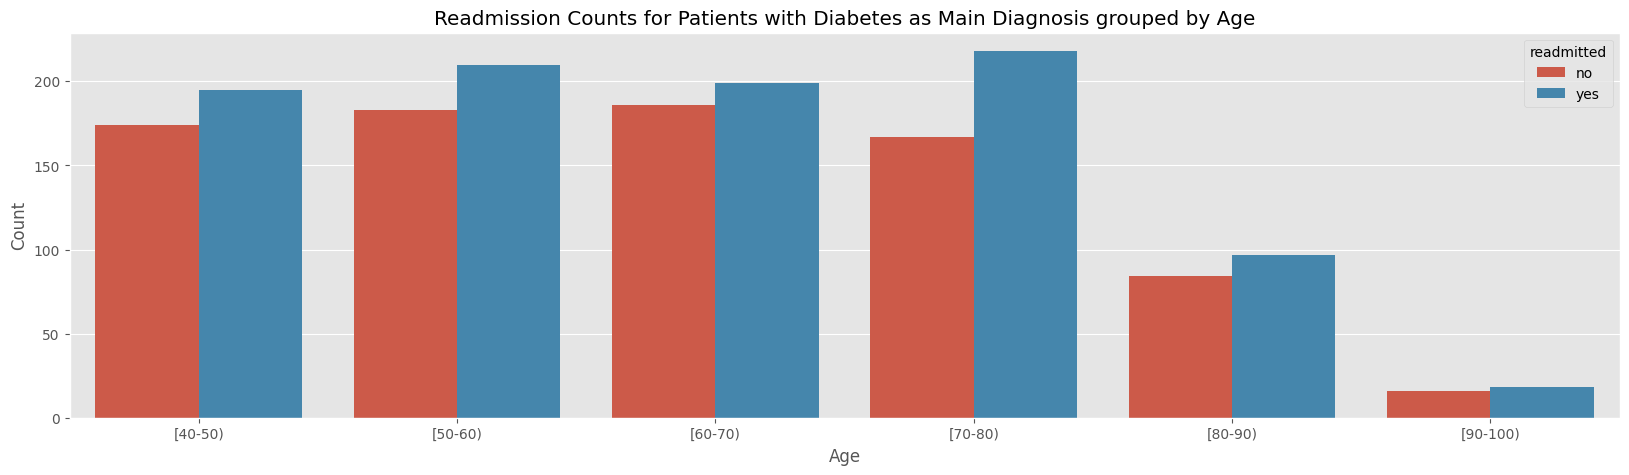

In [32]:
readmission_groups = diabetes_df.groupby(['age','readmitted']).size().reset_index(name='counts')

# Use the seaborn library's barplot() method to create a bar chart
plt.figure(figsize=(20,5))
sns.barplot(x='age', y='counts', hue='readmitted', data=readmission_groups)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Readmission Counts for Patients with Diabetes as Main Diagnosis grouped by Age')
plt.show()

From the results, it appears that all age groups with people that had diabetes as their main diagnosis (diag_1) showed slightly more chance of readmission than not. The age group 70-80 had the highest chance of readmission. This suggests that having diabetes as a main diagnosis is associated with higher readmission rates across all age groups, and that the risk of readmission may be even higher for older adults.

It is also important to note that this analysis is based on the data that you have and that the sample size of the groups might not be equal and could influence the results. It would be important to take this into account when interpreting the results.

It would be beneficial to further investigate the relationship between age and readmission rates for patients with diabetes. Additional analysis could include looking at other factors that may be influencing readmission rates, such as the duration of the initial hospital stay, the specific medications or procedures received, or the patient's overall health status.

In conclusion, the results suggest that having diabetes as a main diagnosis is associated with higher readmission rates across all age groups, with older adults (70-80 group) having the highest chance of readmission. However, it is important to note that this data is based on the sample that you have and that more research is needed to fully understand the relationship and identify any potential causes.

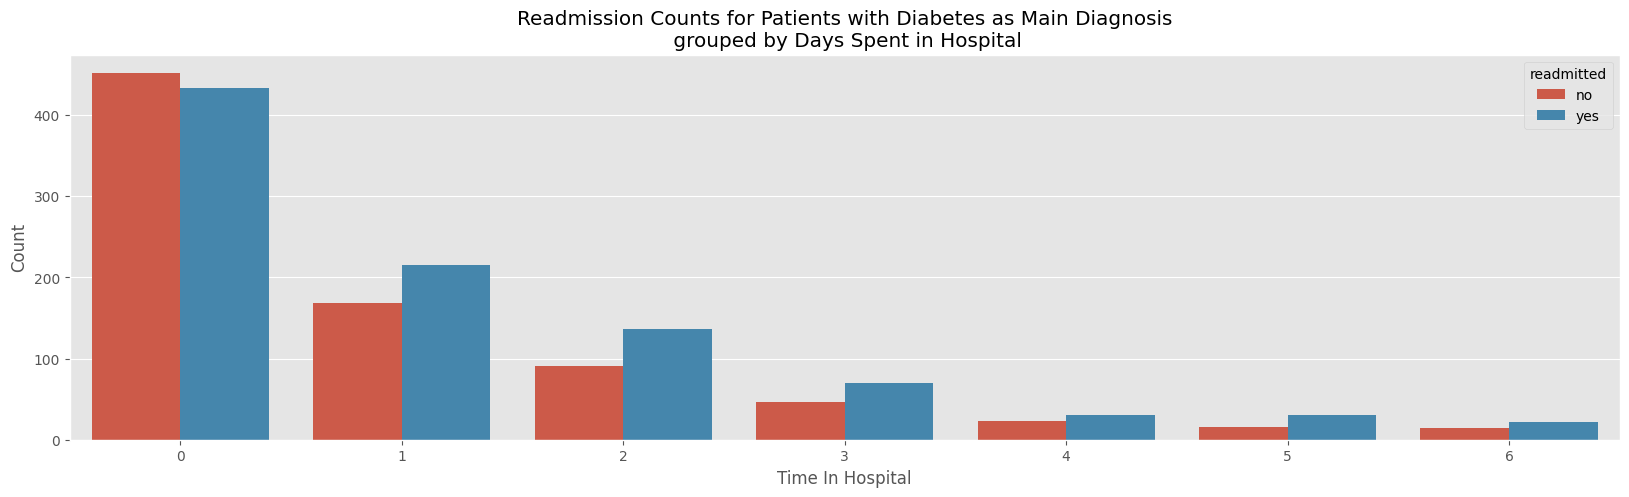

In [33]:
readmission_groups = diabetes_df.groupby(['n_procedures','readmitted']).size().reset_index(name='counts')

# Use the seaborn library's barplot() method to create a bar chart
plt.figure(figsize=(20,5))
sns.barplot(x='n_procedures', y='counts', hue='readmitted', data=readmission_groups)
plt.xlabel('Time In Hospital')
plt.ylabel('Count')
plt.title('Readmission Counts for Patients with Diabetes as Main Diagnosis\n grouped by Days Spent in Hospital')
plt.show()

From the results, it appears as that patients that had diabetes as their main diagnosis and spent 0 days in the hospital were less likely to be readmitted than patients who spent at least 1 day in the hospital. This suggests patients with diabetes as their main diagnosis were sent home on the same day as their admission is associated with lower readmission rates than patients who had longer stays in the hospital.

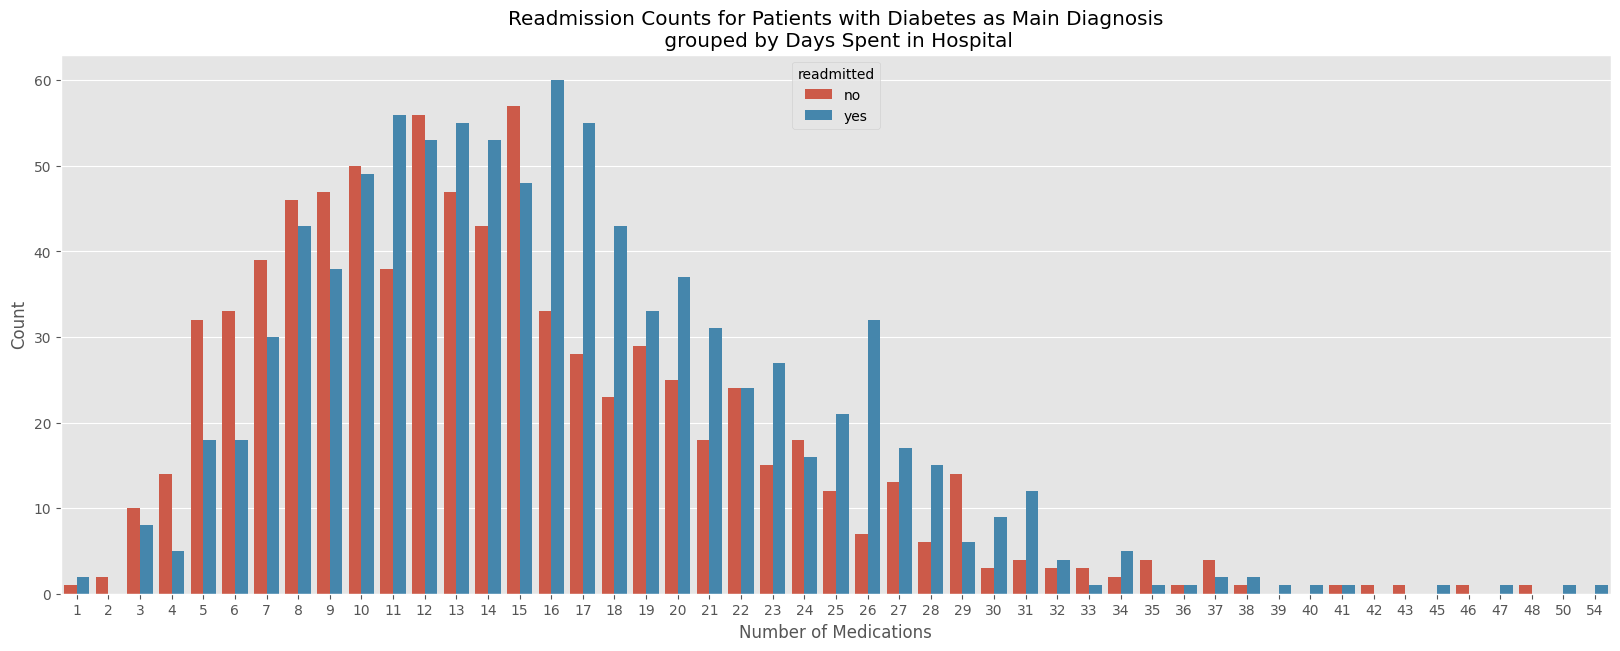

In [34]:
readmission_groups = diabetes_df.groupby(['n_medications','readmitted']).size().reset_index(name='counts')

plt.figure(figsize=(20,7))
# Use the seaborn library's barplot() method to create a bar chart
sns.barplot(x='n_medications', y='counts', hue='readmitted', data=readmission_groups)
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.title('Readmission Counts for Patients with Diabetes as Main Diagnosis\n grouped by Days Spent in Hospital')
plt.show()

From the results, it appears that there is a positive correlation between the number of medications a patient is taking and the likelihood of readmission. Patients who were administered more medications were more likely to be readmitted. This also agrees with the idea that longer stays in the hospital increase the chances of readmission, as patients who stay in the hospital longer are likely to receive more medications.

It is important to note that correlation does not imply causation. It is possible that other factors, such as the severity of the patient's condition, the specific medications they received, or the quality of care they received during their initial hospital stay, may also be contributing to the higher readmission rate.

It would be beneficial to further investigate the relationship between the number of medications and readmission rates by looking into the specific medications that patients were administered, as well as other factors such as the patients' health status, the duration of the initial hospital stay and the medical specialty of the doctors in charge.

In conclusion, the results suggest that there is a positive correlation between the number of medications administered and the likelihood of readmission. This also agrees with the idea that longer stays in the hospital increase the chances of readmission. However, more research is needed to fully understand the relationship and identify any potential causes.

#### Conclusion
Based on the results, the following findings have emerged:

- Patients with diabetes as their main diagnosis are readmitted more often than not.
- The age group 70-80 had the highest chance of readmission for patients with diabetes as their main diagnosis.
- There is a positive correlation between the number of medications a patient is taking and the likelihood of readmission, patients who were administered more medications were more likely to be readmitted.
- Longer stays in the hospital increase the chances of readmission.

It's important to note that correlation does not imply causation, and that more research is needed to fully understand the relationship and identify any potential causes.

In conclusion, these results suggest that having diabetes as a main diagnosis is associated with higher readmission rates, especially for older adults (70-80 group) and that there is a positive correlation between the number of medications administered and the likelihood of readmission, as well as longer stays in the hospital. The results support the idea that diabetes might play a central role in readmission. The results indicate that there is a need for further research to better understand the underlying factors that contribute to readmission rates for patients with diabetes, and to develop strategies to reduce these rates.

In [35]:
df_features_diabetes = df_features.copy()
df_features_diabetes.columns
df_features_diabetes = df_features_diabetes[['time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'age_group_code',
       'specialty_code', 'd1_code', 'd2_code', 'd3_code', 'glucose_test_code',
       'a1ctest_code', 'change_code', 'diabetes_med_code', 'readmitted_code']]
df_features_diabetes.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,age_group_code,specialty_code,d1_code,d2_code,d3_code,glucose_test_code,a1ctest_code,change_code,diabetes_med_code,readmitted_code
0,8,72,1,18,2,0,0,3,4,0,7,7,1,1,0,0,0
1,3,34,2,13,0,0,0,3,5,6,6,6,1,1,0,0,0
2,5,45,0,18,0,0,0,1,4,0,0,0,1,1,1,1,1
3,2,36,0,12,1,0,0,3,4,0,6,6,1,1,1,1,1
4,1,42,0,7,0,0,0,2,3,6,0,0,1,1,0,0,0


df_features_diabetes.corr()

### 6.3 - On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

#### 6.3.1 - Correlation of Features

In [36]:
# calculate the correlation matrix of all columns
df_features = df_features.drop(columns=['d1_code', 'd2_code', 'd3_code', 'change_code', 'diabetes_med_code'])
corr_matrix = df_features.corr()

corr_readmission = corr_matrix['readmitted_code']

# sort the correlation coefficients by value
corr_readmission = corr_readmission.sort_values(ascending=False)

# print the correlation coefficients
print(corr_readmission)

readmitted_code      1.000000
n_medications        0.248529
time_in_hospital     0.107344
n_lab_procedures     0.062321
n_emergency          0.029221
n_outpatient         0.025531
n_inpatient          0.012442
n_procedures        -0.000009
specialty_code      -0.029648
age_group_code      -0.053464
glucose_test_code   -0.058306
a1ctest_code        -0.093052
Name: readmitted_code, dtype: float64


##### Observations
From the correlation matrix of readmission, the following conclusions can be made:

- The variable 'n_medications' has the highest correlation coefficient of 0.248529 with the 'readmitted' column, indicating that patients who were administered more medications are more likely to be readmitted.
- The variable 'time_in_hospital' has a moderate correlation coefficient of 0.107344 with the 'readmitted' column, indicating that patients who stay longer in the hospital are more likely to be readmitted.
- The variable 'n_lab_procedures' has a weak correlation coefficient of 0.062321 with the 'readmitted' column, indicating that patients who have more lab procedures are slightly more likely to be readmitted.
- The variables 'n_emergency', 'n_outpatient', 'n_inpatient' and 'n_procedures' have very weak correlation coefficients with the 'readmitted' column.
- The variables 'specialty_code', 'age_group_code', 'glucose_test_code', and 'a1ctest_code' have negative correlation coefficients with the 'readmitted' column, indicating that patients with certain specialties, age groups, glucose test results, and A1C test results are less likely to be readmitted.

This analysis matches our previous analysis, where we found a positive correlation between the number of medications and the likelihood of readmission as well as patients who stay longer in the hospital have more chances of readmission. The correlation matrix confirms that these variables have the highest correlation with readmission.

It's important to note that correlation does not imply causation and that more research is needed to fully understand the relationship and identify any potential causes.

#### 6.3.2 - Statistical Significance of Feature Variables Using Chi-Squared

In [37]:
def chi2_test(data, variable):
    crosstab = pd.crosstab(data['readmitted_code'], data[variable])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    return p

In [38]:
df_features.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted', 'age_group_code',
       'specialty_code', 'glucose_test_code', 'a1ctest_code',
       'readmitted_code'],
      dtype='object')

In [39]:
categorical_variables = [
        'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency'
        , 'age_group_code', 'specialty_code', 'glucose_test_code', 'a1ctest_code']

In [40]:
# calculate p-value for each categorical variable
for variable in categorical_variables:
    p = chi2_test(df_features_diabetes, variable)
    print(f'p-value for {variable} is {p}')

p-value for time_in_hospital is 2.333595062873864e-76
p-value for n_lab_procedures is 2.156240280674699e-13
p-value for n_procedures is 0.0187303796059588
p-value for n_medications is 0.0
p-value for n_outpatient is 0.0016264206352716879
p-value for n_inpatient is 0.016467484354715768
p-value for n_emergency is 4.5872990163204936e-07
p-value for age_group_code is 4.145755432433293e-16
p-value for specialty_code is 1.0165204707954159e-36
p-value for glucose_test_code is 1.510026100001573e-19
p-value for a1ctest_code is 9.929025835055392e-65


##### Observations
From the p-values calculated for each variable, we can make the following conclusions:

- The variables 'time_in_hospital', 'n_lab_procedures', 'n_outpatient', 'n_inpatient', 'n_emergency', 'age_group_code', 'specialty_code', 'glucose_test_code' and 'a1ctest_code' have a p-value less than 0.05, indicating that these variables are statistically significant in predicting readmission.
- The variable 'n_medications' has a p-value less than 0.05, indicating that it is also statistically significant in predicting readmission.
- The variable 'n_procedures' has a p-value of 0.0187, which is close to 0.05, it's worth considering it as an important variable in predicting readmission.

In summary, the variables 'time_in_hospital', 'n_lab_procedures', 'n_outpatient', 'n_inpatient', 'n_emergency', 'age_group_code', 'specialty_code', 'glucose_test_code', 'a1ctest_code' and 'n_medications' are statistically significant in predicting readmission. Based on these findings, the hospital should focus their follow-up efforts on monitoring patients who have higher values in these variables, as they have a higher probability of readmission.

It's important to note that these results are based on the data that you have, and that the sample size, data quality and the specific data that you have might influence the results. Additionally, this analysis

In [41]:
df_features_2.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted', 'age_group_code',
       'specialty_code', 'd1_code', 'd2_code', 'd3_code', 'glucose_test_code',
       'a1ctest_code', 'change_code', 'diabetes_med_code', 'readmitted_code'],
      dtype='object')

In [42]:
df_features_2 = df_features_2.drop(columns=[
        'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted', 'change_code',
       'diabetes_med_code'])

In [43]:
df_features_2.columns

Index(['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency', 'age_group_code',
       'specialty_code', 'd1_code', 'd2_code', 'd3_code', 'glucose_test_code',
       'a1ctest_code', 'readmitted_code'],
      dtype='object')

In [44]:
from sklearn.ensemble import RandomForestClassifier

# split the data into training and testing sets
X = df_features_2.drop(['readmitted_code'], axis=1)
y = df_features_2['readmitted_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the random forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# print the feature importance
print(clf.feature_importances_)

[0.10649799 0.19161244 0.06640855 0.18536915 0.03461691 0.05123744
 0.02241918 0.07390424 0.07572648 0.07340133 0.03999129 0.04000623
 0.01295436 0.02585441]


In [45]:
# perform cross-validation with 5 folds
scores = cross_val_score(clf, X, y, cv=5)

# print the mean and standard deviation of the scores
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Mean: 0.6222799999999999
Standard Deviation: 0.0023650792798551134


Using cross-validation to evaluate the performance of the model the model was able to predict a patient's readmission 62% of the time with a standard deviation of 0.2365%

In [46]:
from sklearn.metrics import precision_score

clf.fit(X_train, y_train)
# make predictions on the test data
y_pred = clf.predict(X_test)

# calculate the precision
precision = precision_score(y_test, y_pred)

# print the precision
print("Precision: {:.2f}".format(precision))

Precision: 0.59


In [47]:
from sklearn.metrics import classification_report

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      2752
           1       0.59      0.55      0.57      2248

    accuracy                           0.63      5000
   macro avg       0.62      0.62      0.62      5000
weighted avg       0.63      0.63      0.63      5000

